In [1]:
import numpy as np   # to handle matrix and data operation
import pandas as pd  # to read csv and handle dataframe
np.random.seed(1337) # for reproducibility
pd.set_option('display.max_columns', None) # to display all columns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

2023-10-26 19:45:46.599731: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-26 19:45:46.621668: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 19:45:46.621688: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 19:45:46.621704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 19:45:46.626188: I tensorflow/core/platform/cpu_feature_g

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-10-26 19:45:48.181600: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-26 19:45:48.195208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-26 19:45:48.195497: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
# Load the dataset
abt = pd.read_csv('train.csv', encoding="ISO-8859-1")
print('The original size of abt:', abt.shape)

The original size of abt: (42000, 785)


### Checking dataset

In [6]:
abt.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

### Creating helper functions to prepare for training with tf

In [7]:
def split_data(df,split_size):
    df_train, df_test=train_test_split(df, train_size=split_size, shuffle=True, random_state=1337)
    return df_train, df_test

In [8]:
def parse_data_from_input(df):
    images = df.iloc[:, 1:]
    labels = df['label']
    #converting rows to arr.shape[0],28,28 to represent images
    images=np.reshape(images.values,(images.shape[0], 28, 28))
    labels = np.array(labels).astype(np.float64)
    images = np.array(images).astype(np.float64)
    return images, labels

In [9]:
split_size=0.80
df_train, df_test=split_data(abt,split_size)
print(df_train.shape, df_test.shape)
training_images, training_labels = parse_data_from_input(df_train)
validation_images, validation_labels = parse_data_from_input(df_test)

(33600, 785) (8400, 785)


In [10]:
print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (33600, 28, 28) and dtype: float64
Training labels has shape: (33600,) and dtype: float64
Validation images has shape: (8400, 28, 28) and dtype: float64
Validation labels has shape: (8400,) and dtype: float64


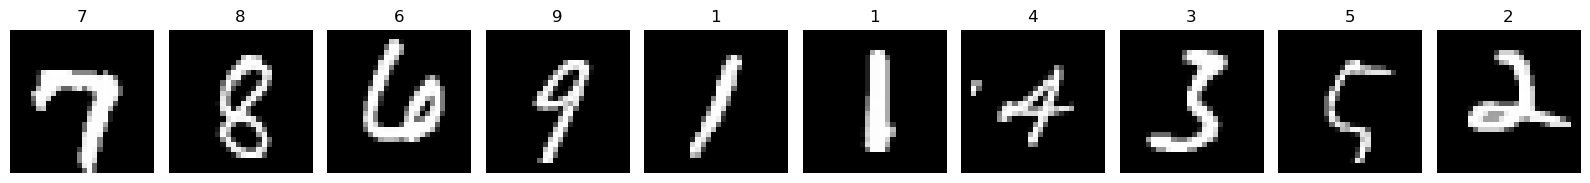

In [11]:
# Ploting a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  numbers = [x for x in range(10)]

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{numbers[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

In [12]:
#standardize
def standardize(img):
    mean=np.mean(img)
    std=np.std(img)
    img=(img-mean)/std
    return img

In [13]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    # Adding another dimention to represent color which is 1 because its gray scale (arr.shape[0], 28, 28, 1)
    training_images = np.expand_dims(training_images,axis=3)
    validation_images = np.expand_dims(validation_images,axis=3)
    #one hot encoding labels
    training_labels = tf.keras.utils.to_categorical(training_labels, num_classes=10)
    validation_labels = tf.keras.utils.to_categorical(validation_labels, num_classes=10)
    #dataset is very well constructed so no need much augmentation
    train_datagen = ImageDataGenerator(
        rescale = 1.0/255.,
        preprocessing_function=standardize,
        shear_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rotation_range=10,
        zoom_range=0.1,
        fill_mode='nearest'
        )
    #flow method train
    train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)
    validation_datagen = ImageDataGenerator(rescale = 1.0/255. ,preprocessing_function=standardize)
    #flow method valid
    validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)
    return train_generator, validation_generator

In [14]:
# Testing generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (33600, 28, 28, 1)
Labels of training generator have shape: (33600, 10)
Images of validation generator have shape: (8400, 28, 28, 1)
Labels of validation generator have shape: (8400, 10)


### Creating the model

In [15]:
def call():
        es = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode='max', # we need the maximum accuracy.
        restore_best_weights=True)
            
        rp = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.2,
        patience=3,
        verbose=1,
        mode='max',
        min_lr=0.00001)
        
        return es,rp
callbacks = call()

In [16]:
def create_model():
  # Defining the model
    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='Same',
                                           kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='Same',
                                           kernel_initializer='he_uniform'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
        
            tf.keras.layers.Conv2D(64, (3,3),padding='Same',
                                   kernel_initializer='he_uniform', activation='relu'),
            tf.keras.layers.Conv2D(64, (3,3),padding='Same',
                                   kernel_initializer='he_uniform', activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flattening the results to feed into dense layers
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.2),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu',kernel_initializer='he_uniform'),
            tf.keras.layers.Dense(10, activation='softmax')
            ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [17]:
# Saving my model
model = create_model()

2023-10-26 19:45:54.890699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-26 19:45:54.891149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-26 19:45:54.891450: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

### Training with minibatches on GPU with tf using callbacks for early stop

In [19]:
# Training my model
history = model.fit(train_generator,
                    epochs=100,
                    callbacks=[callbacks],
                    validation_data=validation_generator)

Epoch 1/100


2023-10-26 19:45:58.043470: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-10-26 19:45:58.713785: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-26 19:45:59.091699: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-26 19:45:59.246138: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-26 19:45:59.612949: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9912f50040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-26 19:45:59.612970: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop 

1050/1050 [==============================] - 27s 23ms/step - loss: 0.2884 - accuracy: 0.9071 - val_loss: 0.0844 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 2/100
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0992 - accuracy: 0.9681 - val_loss: 0.0447 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 3/100
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0744 - accuracy: 0.9774 - val_loss: 0.0574 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 4/100
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0313 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 5/100
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.0334 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 6/100
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0316 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 7/100
1050/1050 [=============================

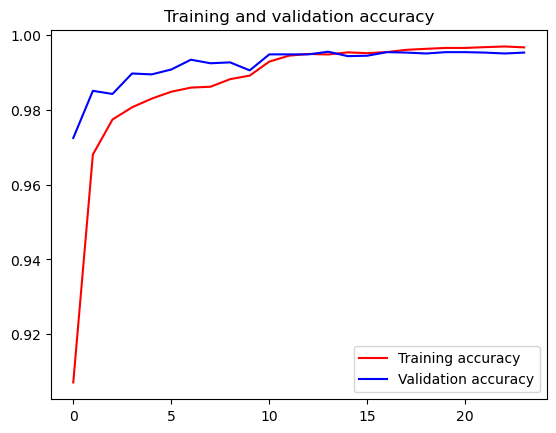

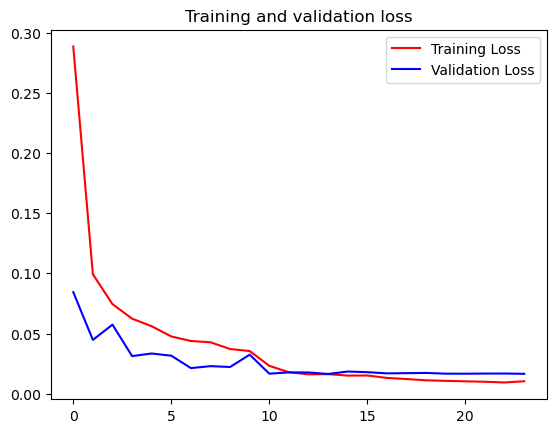

In [20]:
# Ploting the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluating model performance

In [21]:
x_val= validation_images/255.0
x_val= standardize(x_val)
y_pred_valid = model.predict(x_val)
y_pred_valid = tf.math.argmax(y_pred_valid, 1).numpy()

263/263 [==============================] - 1s 4ms/step


In [22]:
from sklearn import metrics
print("****** Test Data ********")

# Print performance details
print(metrics.classification_report(validation_labels, y_pred_valid))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(validation_labels, y_pred_valid, rownames=['True'], colnames=['Predicted'], margins=True))

****** Test Data ********
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       857
         1.0       1.00      1.00      1.00       920
         2.0       1.00      0.99      0.99       836
         3.0       0.99      1.00      0.99       827
         4.0       0.98      0.99      0.99       831
         5.0       0.99      0.99      0.99       754
         6.0       0.99      0.99      0.99       849
         7.0       1.00      1.00      1.00       915
         8.0       0.99      0.99      0.99       821
         9.0       0.99      0.98      0.99       790

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0.0,856,0,0,0,0,0,1,0,0,0,857
1.0,0,916,0,0,3,0,0,1,0,0,920
2.0,1,0,827,1,0,0,3,3,1,0,836
3.0,0,0,1,824,0,2,0,0,0,0,827
4.0,0,0,0,0,826,0,1,0,1,3,831
5.0,0,0,0,3,0,749,0,0,2,0,754
6.0,1,0,0,0,0,4,842,0,2,0,849
7.0,0,1,1,1,1,0,0,911,0,0,915
8.0,0,0,2,1,0,2,4,0,810,2,821


#### Lets see what it classify incorrectly

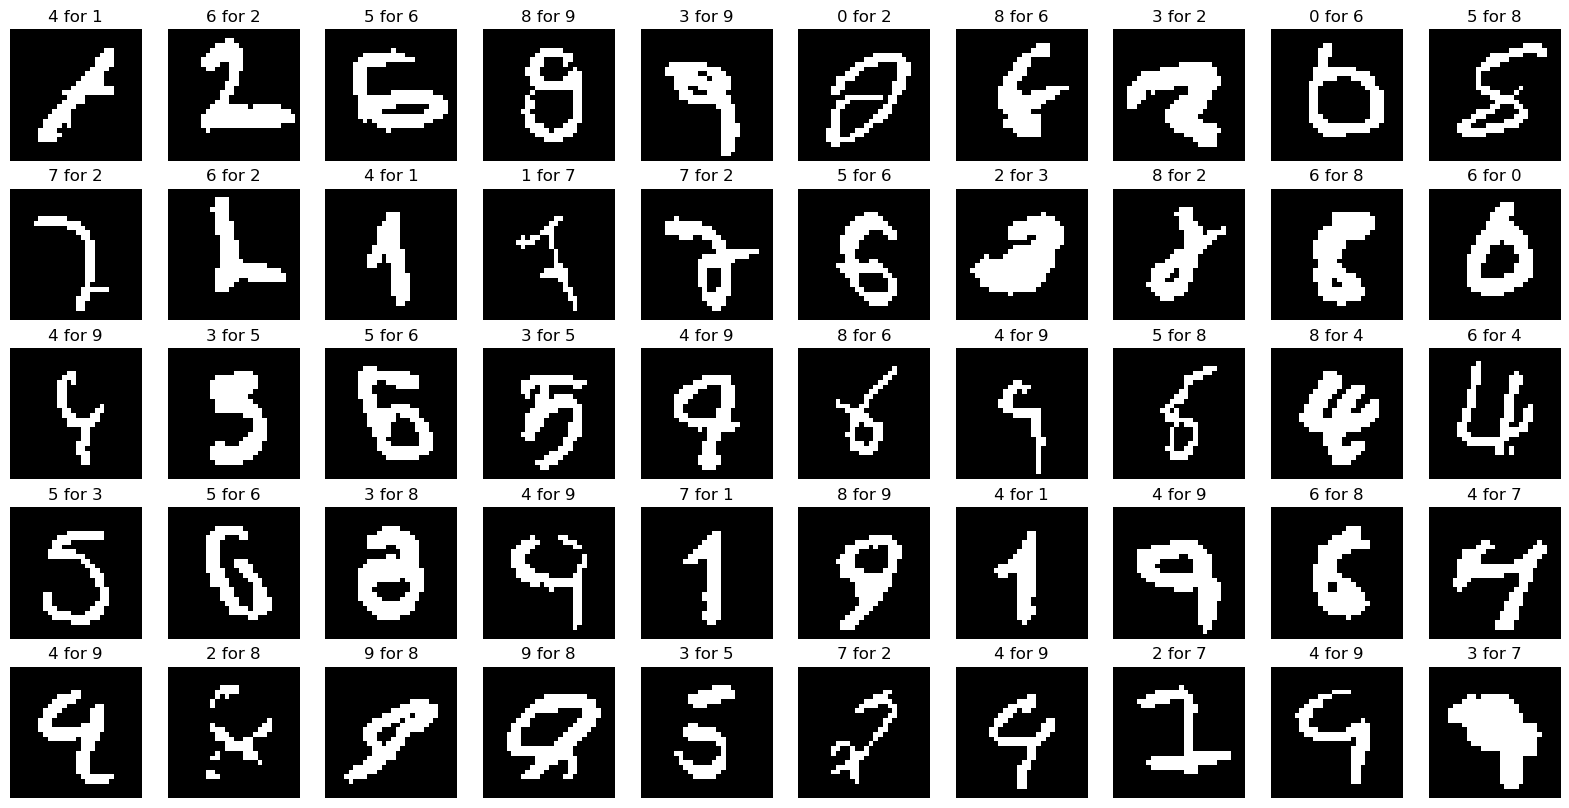

In [23]:
pltsize=2
row_images = 5
col_images = 10

maxtoshow = row_images * col_images
predictions = y_pred_valid.reshape(-1)
errors = predictions != validation_labels
counter = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(x_val.shape[0]):
    if counter>=maxtoshow:
        break
    if errors[i]:
        plt.subplot(row_images,col_images, counter+1)
        plt.axis('off')
        plt.imshow((x_val[i]).astype('int').reshape(28,28), cmap='gray', vmin=0, vmax=1)
        plt.title("{} for {}".format(predictions[i], int(validation_labels[i])))
        counter = counter + 1

### Making predictions for submission

In [24]:
test_df = pd.read_csv('test.csv', encoding="ISO-8859-1")
print('The original size of abt:', abt.shape)

The original size of abt: (42000, 785)


In [25]:
# Making a set of predictions for the test data
images_test=np.reshape(test_df.values,(test_df.shape[0], 28, 28))
images_test = np.array(images_test).astype(np.float64)
x_test=images_test/255.0
x_test= standardize(x_test)
y_pred = model.predict(x_test)

875/875 [==============================] - 3s 4ms/step


In [26]:
y_pred = tf.math.argmax(y_pred, 1).numpy()

In [27]:
final_out = pd.DataFrame({'ImageId': [x for x in range(1,len(y_pred)+1)], 'Label': y_pred})
final_out.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


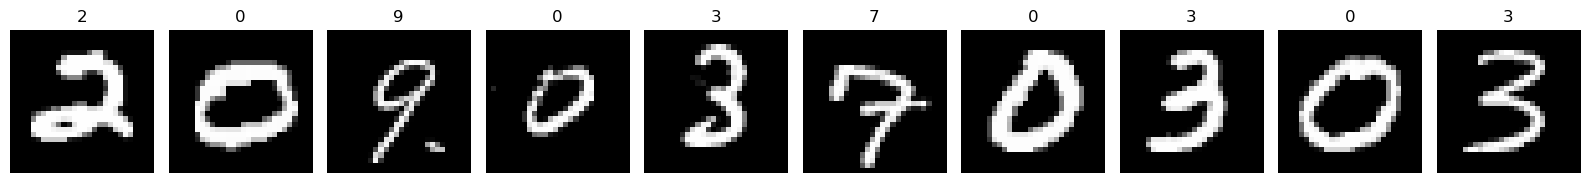

In [28]:
plot_categories(x_test, y_pred)

ladder score 425/1504 top 29%. Accuracy: 0.99271